In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

C:\Users\Tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Tanis\.cache\kagglehub\datasets\mirichoi0218\insurance\versions\1


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Prepare data for linear regression. Must do one-hot encoding to make sure the categorical features can be used in linear regression.

In [4]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder = encoder.fit_transform(df[categorical])
one_hot_df = pd.DataFrame(one_hot_encoder, columns=encoder.get_feature_names_out(categorical))
df_encoded = pd.concat([df, one_hot_df], axis=1)
insurance = df_encoded.drop(categorical, axis=1)

insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Use simple linear regression to predict charges from the bmi

In [5]:
X = insurance[['age']].values.reshape(-1, 1)
y = insurance[['charges']].values.reshape(-1, 1)

In [6]:
simpleLinear = LinearRegression()
simpleLinear.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predicting the charges when the bmi is 30, 40, and 50

In [7]:
thirty = simpleLinear.predict([[30]])
forty = simpleLinear.predict([[40]])
fifty = simpleLinear.predict([[50]])

thirty, forty, fifty

(array([[10897.56356607]]),
 array([[13474.78975274]]),
 array([[16052.01593941]]))

Predicting with the X dataframe and plotting the data

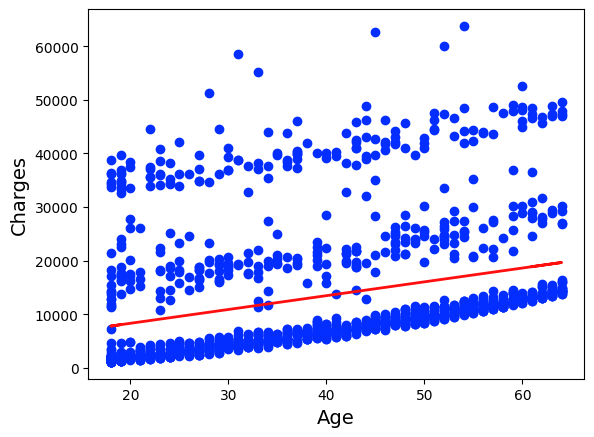

In [8]:
predict = simpleLinear.predict(X)

plt.scatter(X, y, color="#042eff")
plt.plot(X, predict, color="#ff0e0e", linewidth=2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

Also Using Decision Tree Regressor to Model the Relationship

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = insurance.drop('charges', axis=1)
y = insurance[['charges']]

In [7]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Plotting the Data

In [8]:
age = np.linspace(insurance['age'].min(), insurance['age'].max(), 50)
bmi = np.linspace(insurance['bmi'].min(), insurance['bmi'].max(), 50)

age_grid, bmi_grid = np.meshgrid(age, bmi)

fixed_values = {
    'children' : insurance['children'].median(),
    'sex_male'  : 1,
    'sex_female': 0,
    'smoker_no' : 1,
    'smoker_yes': 0,
    'northeast' : 0,
    'northwest' : 0,
    'southeast' : 1,
    'southwest' : 0
}

grid = np.c_[
    age_grid.ravel(),
    bmi_grid.ravel(),
]


for index, value in list(fixed_values.items()):
    fixed_array = np.full_like(age_grid.ravel(), fixed_values[index]).reshape(-1, 1)
    grid = np.hstack([grid, fixed_array])

pred = tree.predict(grid).reshape(age_grid.shape)

C:\Users\Tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


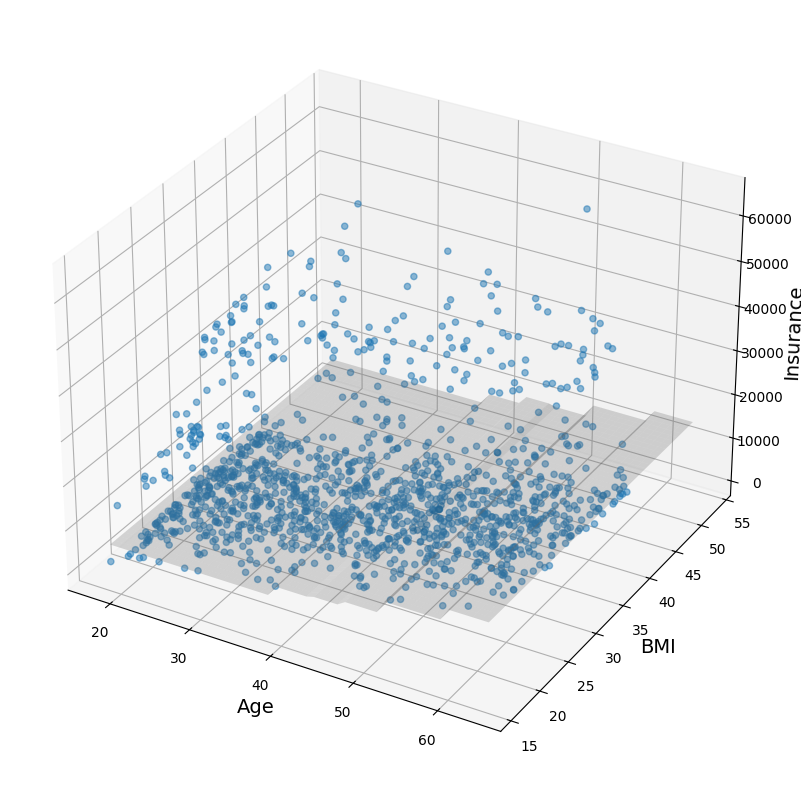

In [9]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(insurance[['age']], insurance[['bmi']], insurance[['charges']], color='#1f77b4', alpha=0.5)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('BMI', fontsize=14)
ax.set_zlabel('Insurance', fontsize=14)
ax.plot_surface(age_grid, bmi_grid, pred, alpha=.25, color='grey')
plt.show()

As age and BMI increase, there seems to be a general trend upward. However, many points lie above the grey prediction surface. This indicates that age and BMI might not be sufficient enough to predict insurance costs. 

Predicting Future Inputs with Models

In [10]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [11]:
models = {
    "Random Forest" : RandomForestRegressor(),
    "XGB" : XGBRegressor()
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    try:
        score = cross_val_score(
            model,
            X, 
            y, 
            cv=kfold,
            scoring='r2',
            n_jobs=-1,
            error_score='raise'
        )
        print(f"Model: {model_name}")
        print(f"Scores: {score}")
        print(f"Mean Accuracy: {score.mean():.4f}")
    except Exception as e:
        print("failure")


Model: Random Forest
Scores: [0.85975741 0.83116831 0.86771566 0.78706679 0.8286588 ]
Mean Accuracy: 0.8349
Model: XGB
Scores: [0.85536486 0.79623675 0.84007263 0.76486981 0.8057279 ]
Mean Accuracy: 0.8125


In [12]:
svr = SVR(kernel='rbf', C=100, gamma='auto')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
svr.fit(X_scaled, y_scaled)
svr_pred = svr.predict(X_scaled)

mse = mean_squared_error(y_scaled, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_scaled, svr_pred)
mae = mean_absolute_error(y_scaled, svr_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")
print(f"MAE: {mae:.2f}")


C:\Users\Tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.12
RMSE: 0.34
R^2: 0.88
MAE: 0.17


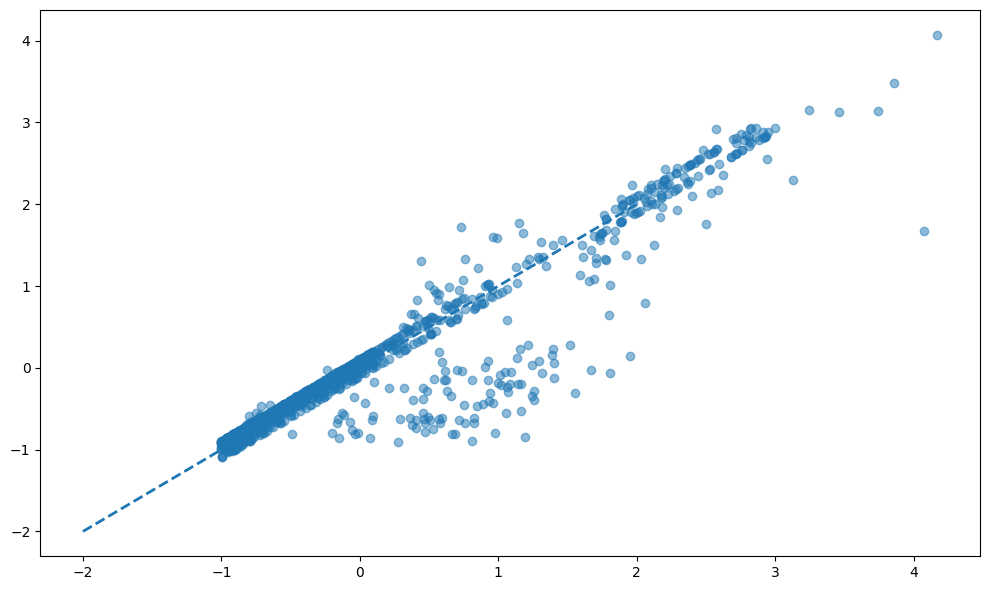

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_scaled, svr_pred, alpha=0.5)
plt.plot([-2, 2], [-2, 2], '--', lw=2) 
plt.tight_layout()
plt.show()

In [71]:
def data_clean_helper(sex_col, smoker_col):
    other_sex = "sex_female" if sex_col == "sex_male" else "sex_male"
    other_smoker = "smoker_no" if smoker_col == "smoker_yes" else "smoker_yes"
    
    return other_sex, other_smoker


In [29]:
def define_region(data, value_index, region_col):
    regions = ["northeast", "northwest", "southeast", "southwest"]

    for region in regions:
        if region == region_col:
            data[value_index[region_col]] = 1.0
        else:
            data[value_index["region_" + region]] = 0.0
    
    return data


In [67]:
values = X.columns.values
value_index = {col: i for i, col in enumerate(values)}

def data_clean(input):
    input_values = input.split(",")
    data = [0] * len(value_index)

    data[value_index['age']] = int(input_values[0])
    data[value_index['bmi']] = float(input_values[1])
    data[value_index['children']] = int(input_values[2])

    sex_col = "sex_" + input_values[3].strip().lower()
    smoker_col = "smoker_" + input_values[4].strip().lower()
    region_col = "region_" + input_values[5].strip().lower()

    other_sex, other_smoker = data_clean_helper(sex_col, smoker_col)

    data[value_index[sex_col]] = 1.0
    data[value_index[other_sex]] = 0.0

    data[value_index[smoker_col]] = 1.0
    data[value_index[other_smoker]] = 0.0

    data = define_region(data, value_index, region_col)


    return data

In [65]:
def predict_insurance(input):

    data = data_clean(input)

    scaled_data = scaler.fit_transform([data])
    
    return svr.predict(scaled_data)[0]

In [73]:
user_input = predict_insurance("23,34.0,2,male,yes,northwest")

user_input

np.float64(-0.4763094537046457)